In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [ ]:
start = '2015-10-01'
end = '2022-2-15'

df=data.DataReader('HDFCBANK.NS','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-10-01,538.450012,529.674988,537.599976,533.825012,2517394.0,516.030762
2015-10-05,552.400024,538.599976,538.599976,549.174988,4026686.0,530.869141
2015-10-06,553.950012,541.500000,553.500000,542.974976,2379482.0,524.875793
2015-10-07,549.174988,541.674988,544.000000,543.875000,2193134.0,525.745850
2015-10-08,545.349976,537.700012,544.049988,541.549988,1940954.0,523.498291


In [ ]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-10,1535.500000,1501.650024,1514.000000,1525.099976,7157265.0,1525.099976
2022-02-11,1525.000000,1499.500000,1500.250000,1518.849976,5355552.0,1518.849976
2022-02-14,1499.449951,1469.300049,1490.000000,1473.699951,7328310.0,1473.699951
2022-02-15,1524.900024,1473.050049,1476.000000,1517.800049,6567533.0,1517.800049
2022-02-16,1534.750000,1507.000000,1534.349976,1515.750000,5016132.0,1515.750000


In [ ]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-10-01,538.450012,529.674988,537.599976,533.825012,2517394.0,516.030762
1,2015-10-05,552.400024,538.599976,538.599976,549.174988,4026686.0,530.869141
2,2015-10-06,553.950012,541.500000,553.500000,542.974976,2379482.0,524.875793
3,2015-10-07,549.174988,541.674988,544.000000,543.875000,2193134.0,525.745850
4,2015-10-08,545.349976,537.700012,544.049988,541.549988,1940954.0,523.498291


In [ ]:
df =df.drop(['Date','Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,538.450012,529.674988,537.599976,533.825012,2517394.0
1,552.400024,538.599976,538.599976,549.174988,4026686.0
2,553.950012,541.500000,553.500000,542.974976,2379482.0
3,549.174988,541.674988,544.000000,543.875000,2193134.0
4,545.349976,537.700012,544.049988,541.549988,1940954.0


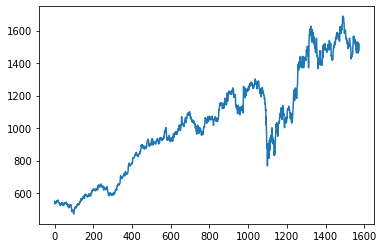

In [ ]:
#import matplotlib.pyplot as plt
plt.plot(df.Close)


In [ ]:
df

,High,Low,Open,Close,Volume
0,538.450012,529.674988,537.599976,533.825012,2517394.0
1,552.400024,538.599976,538.599976,549.174988,4026686.0
2,553.950012,541.500000,553.500000,542.974976,2379482.0
3,549.174988,541.674988,544.000000,543.875000,2193134.0
4,545.349976,537.700012,544.049988,541.549988,1940954.0
...,...,...,...,...,...
1569,1535.500000,1501.650024,1514.000000,1525.099976,7157265.0
1570,1525.000000,1499.500000,1500.250000,1518.849976,5355552.0
1571,1499.449951,1469.300049,1490.000000,1473.699951,7328310.0
1572,1524.900024,1473.050049,1476.000000,1517.800049,6567533.0


In [ ]:
#mean is the average mean
ma10 =df.Close.rolling(10).mean()
ma10

In [ ]:
ma20 =df.Close.rolling(20).mean()
ma20

In [ ]:
ma50 =df.Close.rolling(50).mean()
ma50

In [ ]:
ma100 =df.Close.rolling(100).mean()
ma100

In [ ]:
ma200 =df.Close.rolling(200).mean()
ma200

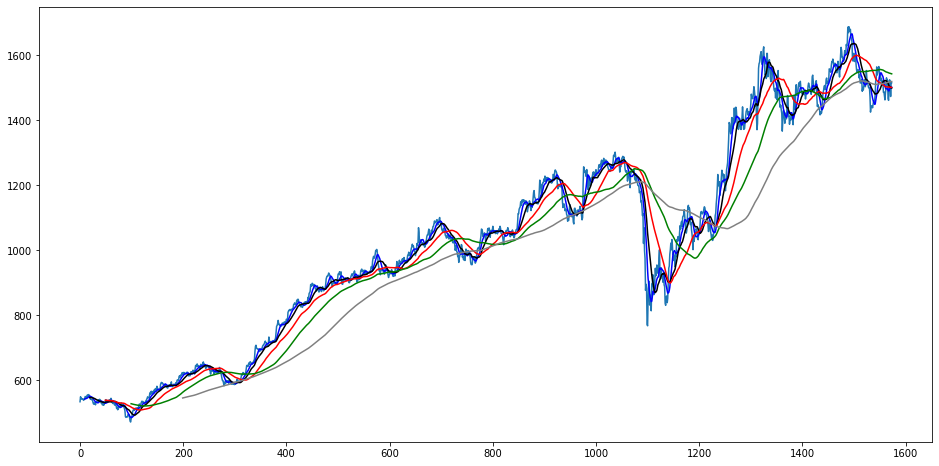

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(df.Close)
plt.plot(ma10,'blue')
plt.plot(ma20,'black')
plt.plot(ma50,'red')
plt.plot(ma100,'green')
plt.plot(ma200,'grey')

In [ ]:
#df.shape
#Now the Testing and Traning the data
#here the 70% data traing and after 30% are test the data

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1101, 1)
(473, 1)


In [ ]:
data_training.head()

,Close
0,533.825012
1,549.174988
2,542.974976
3,543.875000
4,541.549988


In [ ]:
data_testing.head()
#data_testing.tail()

,Close
1101,856.750000
1102,901.099976
1103,904.450012
1104,831.650024
1105,861.900024


In [ ]:
#import the sklearn learing minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [ ]:
#store in array
data_training_array = scaler.fit_transform(data_training)
data_training_array
#data_training_array.shape

array([[0.0752038 ],
       [0.09367383],
       [0.08621359],
       ...,
       [0.49517186],
       [0.36124895],
       [0.35661643]])

In [ ]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train =np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

(1001, 100, 1)

In [ ]:
#ML Model
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()

model.add(LSTM(units=50,activation='relu' , return_sequences=True,
               input_shape = (x_train.shape[1], 1))) 
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu' , return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu' , return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_4 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_6 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
32/32 [==============================] - 16s 264ms/step - loss: 0.1182
Epoch 2/50
32/32 [==============================] - 9s 265ms/step - loss: 0.0180
Epoch 3/50
32/32 [==============================] - 9s 268ms/step - loss: 0.0139
Epoch 4/50
32/32 [==============================] - 8s 262ms/step - loss: 0.0115
Epoch 5/50
32/32 [==============================] - 8s 263ms/step - loss: 0.0108
Epoch 6/50
32/32 [==============================] - 9s 270ms/step - loss: 0.0135
Epoch 7/50
32/32 [==============================] - 8s 259ms/step - loss: 0.0106
Epoch 8/50
32/32 [==============================] - 8s 265ms/step - loss: 0.0116
Epoch 9/50
32/32 [==============================] - 8s 265ms/step - loss: 0.0113
Epoch 10/50
32/32 [==============================] - 9s 274ms/step - loss: 0.0100
Epoch 11/50
32/32 [==============================] - 8s 258ms/step - loss: 0.0096
Epoch 12/50
32/32 [==============================] - 9s 268ms/step - loss: 0.0107
Epoch 13/50
32/32 [=====

In [ ]:
 model.save('keras_model.h5')

In [ ]:
#import os
#os.getcwd()
#os.listdir()

In [ ]:
data_testing.head()

,Close
1101,856.750000
1102,901.099976
1103,904.450012
1104,831.650024
1105,861.900024


In [ ]:
data_training.tail(100)

In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df=past_100_days.append(data_testing,ignore_index=True)

In [ ]:
final_df.head()

,Close
0,1230.349976
1,1240.050049
2,1236.849976
3,1239.500000
4,1256.650024


In [ ]:
input_data=scaler.fit_transform(final_df)
input_data

In [ ]:
input_data.shape

(573, 1)

In [ ]:
x_test =[]
y_test = []

for i in range(100,input_data.shape[0]):
     x_test.append(input_data[i-100:i])
     y_test.append(input_data[i,0])

In [ ]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(473, 100, 1)
(473,)


In [ ]:
y_predicted = model.predict(x_test)

In [ ]:
y_predicted.shape

(473, 1)

In [ ]:
y_test

array([0.09668838, 0.14484253, 0.14847992, 0.06943541, 0.10228015,
       0.06726386, 0.05010854, 0.13941365, 0.13159611, 0.17084689,
       0.13859932, 0.1038002 , 0.12166123, 0.15483169, 0.19234525,
       0.16715529, 0.17470138, 0.20331163, 0.18496198, 0.17589578,
       0.17774161, 0.22736154, 0.25418023, 0.16862106, 0.15608036,
       0.19402826, 0.17079261, 0.17519   , 0.16080346, 0.14533114,
       0.17366995, 0.13680783, 0.13078178, 0.0748643 , 0.06834964,
       0.09706837, 0.09972854, 0.07725295, 0.09196527, 0.14761132,
       0.19277959, 0.19972858, 0.23881653, 0.25331162, 0.27638437,
       0.25407168, 0.28843646, 0.26948972, 0.23843647, 0.24337674,
       0.21813244, 0.2334962 , 0.19777413, 0.24180242, 0.22969598,
       0.2738871 , 0.28843646, 0.28344192, 0.29815424, 0.28751358,
       0.28344192, 0.31351787, 0.33479919, 0.32372419, 0.3440825 ,
       0.34929428, 0.33251896, 0.36406081, 0.36639526, 0.37204124,
       0.38789355, 0.36634092, 0.3393594 , 0.31612376, 0.30993

In [ ]:
y_predicted

array([[0.37815902],
       [0.35351428],
       [0.32825193],
       [0.3046612 ],
       [0.2834351 ],
       [0.2640142 ],
       [0.24599254],
       [0.2290666 ],
       [0.21351197],
       [0.19963814],
       [0.18774226],
       [0.17796466],
       [0.17020679],
       [0.16429663],
       [0.16011438],
       [0.15764427],
       [0.15672372],
       [0.15720311],
       [0.1589502 ],
       [0.16176467],
       [0.16533048],
       [0.16940475],
       [0.1738567 ],
       [0.17864016],
       [0.18354194],
       [0.18829289],
       [0.19268307],
       [0.19657642],
       [0.19987902],
       [0.2025218 ],
       [0.20445018],
       [0.20566611],
       [0.20614061],
       [0.20590024],
       [0.20487776],
       [0.20300612],
       [0.20032589],
       [0.19691606],
       [0.19285616],
       [0.18825166],
       [0.18336503],
       [0.17867889],
       [0.17469892],
       [0.17191227],
       [0.17068475],
       [0.17125824],
       [0.173593  ],
       [0.177

In [ ]:
scaler.scale_

array([0.00108578])

In [ ]:
scaler_factor = 1/0.00108578
y_predicted=y_predicted*scaler_factor
y_test =y_test * scaler_factor


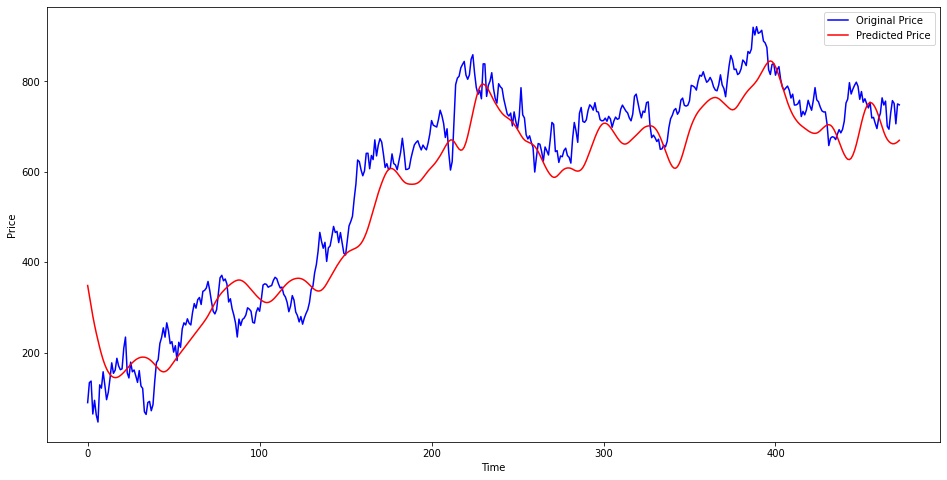

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test,'blue', label ='Original Price')
plt.plot(y_predicted,'red', label ='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()